In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("final/kuusamo_df.csv")
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Year                          7671 non-null   int64         
 1   Month                         7671 non-null   int64         
 2   Day                           7671 non-null   int64         
 3   Date                          7671 non-null   datetime64[ns]
 4   Snow depth mean [cm]          7671 non-null   float64       
 5   Average temperature [°C]      7671 non-null   float64       
 6   cloud_code                    7671 non-null   float64       
 7   Global radiation mean [W/m2]  7671 non-null   float64       
 8   day_of_year                   7671 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3)
memory usage: 509.5 KB


In [19]:
#models = {}

print(models)

{np.int64(2004): poly1d([ 5.50302560e-10, -6.00676379e-07,  2.45179336e-04, -4.38568365e-02,
        2.84956399e+00,  4.44273322e+00]), np.int64(2005): poly1d([ 6.37601444e-10, -6.56102247e-07,  2.52519791e-04, -4.27414580e-02,
        2.62643094e+00,  6.95384452e+00]), np.int64(2006): poly1d([ 4.27344747e-10, -5.01296915e-07,  2.16990398e-04, -4.02510976e-02,
        2.59888868e+00,  1.36681215e+01]), np.int64(2007): poly1d([ 3.64795615e-10, -4.42833049e-07,  1.98512374e-04, -3.82928955e-02,
        2.63283468e+00,  3.26890176e+00]), np.int64(2008): poly1d([ 4.31307851e-10, -4.79626229e-07,  2.02310101e-04, -3.77179735e-02,
        2.57438427e+00,  6.29077257e-01]), np.int64(2009): poly1d([ 3.58504861e-10, -4.13123115e-07,  1.80320913e-04, -3.42311362e-02,
        2.28019432e+00,  1.20250437e+01]), np.int64(2010): poly1d([ 5.79929414e-10, -6.54547082e-07,  2.73923209e-04, -4.97997773e-02,
        3.25061782e+00,  6.60450134e+00]), np.int64(2011): poly1d([ 8.34353141e-10, -8.23379684e-

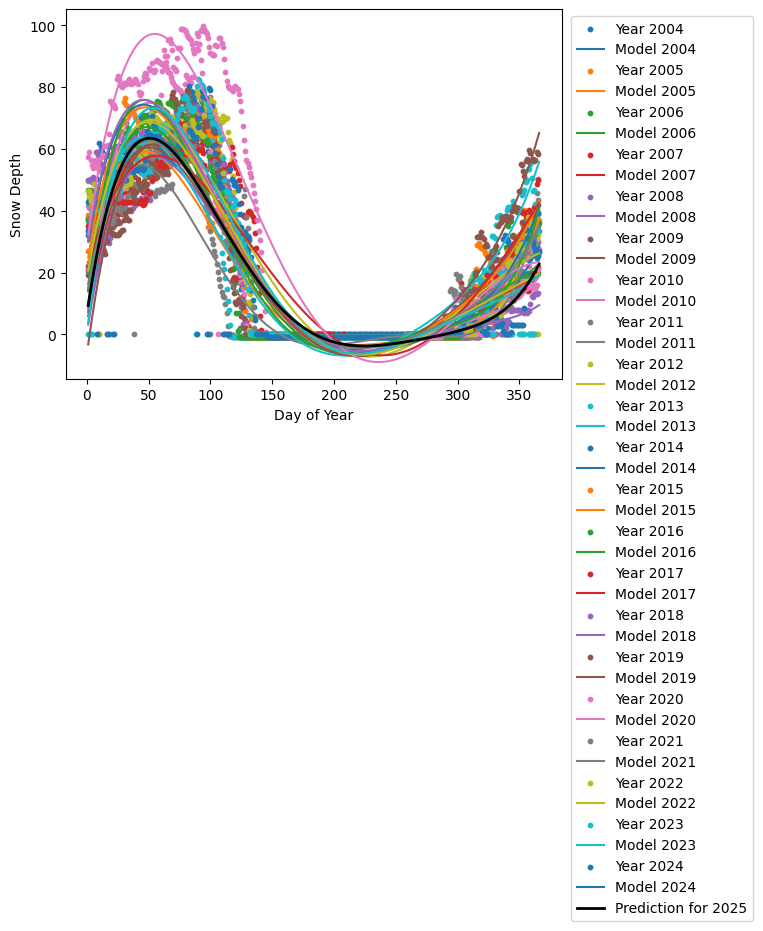

In [ ]:
for year in df['Year'].unique():
    
    year_data = df[df['Year'] == year]
    
    
    mymodel = np.poly1d(np.polyfit(year_data['day_of_year'], year_data['Snow depth mean [cm]'], 5))
    
    
    models[year] = mymodel
    
    
    plt.scatter(year_data['day_of_year'], year_data['Snow depth mean [cm]'], label=f'Year {year}', s=10)
    myline = np.linspace(1, 366, 366)  
    plt.plot(myline, mymodel(myline), label=f'Model {year}')

next_year = max(df['Year']) + 1
next_year_data = np.linspace(1, 366, 366)
next_year_predictions = models[max(df['Year'])](next_year_data)


plt.plot(next_year_data, next_year_predictions, color='black', label=f'Prediction for {next_year}', linewidth=2)
plt.xlabel('Day of Year')
plt.ylabel('Snow Depth')
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.show()


In [33]:
snowdept = models[max(df['Year'])](2)
print(snowdept)

11.915214125126676
